## Step 2 Tableau Analysis Reporting

##### Growth Analysis Dashbaord
- growth data to display top growth firm
- scatter plot: deep green or greens are counted as top growing firm with the best performing revenue and expense
Dashboard Link: https://public.tableau.com/profile/xiaoyang.wu#!/vizhome/StartupTopGrowthAnalysis/TopGrowthAnalysis?publish=yes

![dashboard1](../Image/Dashboard1.png)

#### Selected Potential Companies for Investment Dashboard
- Selected Companies Analysis
- Selected companies Industry analysis (bar chart)
Dashboard Link: https://public.tableau.com/profile/xiaoyang.wu#!/vizhome/SelectedStartupforVentureCapitalInvestingAnalysis/SelectedPotentialCompaniesforInvestment?publish=yes

![dashboard2](../Image/Dashboard2.png)

##### Top Profitable Companies to Invest Dashboard
- Top N Most Profitable Companies (Portfolio Analysis)
- Top N Mots Profitable Companies (tree map)
Dashboard Link: https://public.tableau.com/profile/xiaoyang.wu#!/vizhome/TopNMostProfitableStartupforInvestingAnalysis/TopProfitableCompaniestoInvest?publish=yes

![dashboard3](../Image/Dashboard3.png)


## Step 3 Build Pediction Models Based Selected 100 Companies 

#### Profit Prediction Model

Model 1: Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# data import and merge with main data set into a new top 100 startup
df_top100 = pd.read_csv("../Dataset/Top_100_Most_Profitable_Startup.csv")
df_main = pd.read_csv("../Dataset/P11-1000-Startups_cleaned.csv")
df_top_startup = pd.merge(df_top100,df_main,on='ID',how='left')
df_top_startup_ready = df_top_startup[['2019 Revenue', 
                                       '2019 Growth %', 'Employees', 'Company Founded Longevity', 
                                       'Admin Spend (2019)', 
                                      'Marketing & Sales Spend (2019)',  
                                       'R&D Spend (2019)',   '2019 Profit'] ]
# select only the needed features

In [3]:
df_top_startup_ready.head()

,2019 Revenue,2019 Growth %,Employees,Company Founded Longevity,Admin Spend (2019),Marketing & Sales Spend (2019),R&D Spend (2019),2019 Profit
0,11000642.42,3.25,45,5,369611.581,428361.362,549499.098,9653170.37
1,12386572.10,4.27,7,7,1112969.530,840625.183,2185377.137,8247600.25
2,9898504.71,4.26,28,4,254386.025,565080.156,846454.089,8232584.44
3,11835820.05,4.46,43,3,607713.850,686288.963,2021402.807,8520414.43
4,12506421.46,4.18,15,3,1068152.173,835961.383,1822865.414,8779442.49


In [4]:
X = df_top_startup_ready.iloc[:,:-1].values
y = df_top_startup_ready.iloc[:,-1].values

In [5]:
X[:3]

array([[1.10006424e+07, 3.25000000e+00, 4.50000000e+01, 5.00000000e+00,
        3.69611581e+05, 4.28361362e+05, 5.49499098e+05],
       [1.23865721e+07, 4.27000000e+00, 7.00000000e+00, 7.00000000e+00,
        1.11296953e+06, 8.40625183e+05, 2.18537714e+06],
       [9.89850471e+06, 4.26000000e+00, 2.80000000e+01, 4.00000000e+00,
        2.54386025e+05, 5.65080156e+05, 8.46454089e+05]])

In [6]:
# dummy variables ppc
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder # for categorical variable
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [7])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

In [7]:
print(X[:3])

[[1.10006424e+07 3.25000000e+00 4.50000000e+01 5.00000000e+00
  3.69611581e+05 4.28361362e+05 5.49499098e+05]
 [1.23865721e+07 4.27000000e+00 7.00000000e+00 7.00000000e+00
  1.11296953e+06 8.40625183e+05 2.18537714e+06]
 [9.89850471e+06 4.26000000e+00 2.80000000e+01 4.00000000e+00
  2.54386025e+05 5.65080156e+05 8.46454089e+05]]


In [8]:
# split train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

In [9]:
# train data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
# test data
y_pred = regressor.predict(X_test)

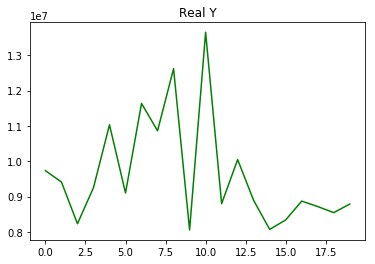

Text(0.5,1,'Y Predicted')

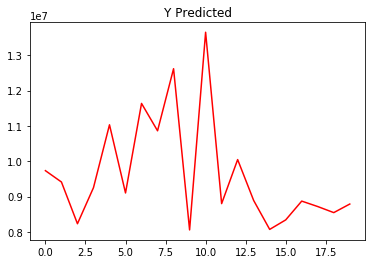

In [11]:
# compare result
plt.plot( y_test, color = 'green')
plt.title("Real Y")
# plt.legend(['predicted profit', 'real profit'], loc = 'upper right')
plt.show()

plt.plot( y_pred, color = 'red')
plt.title("Y Predicted")

In [12]:
print(np.round(regressor.intercept_, 6))
print(regressor.coef_, 6)
print("2019 Profit = 1 * X1 (2019 Reveneu) + 0.0014147 * X2 (2019 Growth) - 2.55003695e-06 * X3 (Number of Employee) -2.83187758e-06 * X4(Company Founded Lengevity) -0.9999 * X5 (Admin Spend (2019)) -1 * X6(Marketing & Sales Spend (2019)) -1 * X7 (R&D Spend (2019))    -0.013577  ")
      
     

-0.013577
[ 1.00000000e+00  1.41470335e-03 -2.55003695e-06 -2.83187758e-06
 -9.99999998e-01 -1.00000000e+00 -1.00000000e+00] 6
2019 Profit = 1 * X1 (2019 Reveneu) + 0.0014147 * X2 (2019 Growth) - 2.55003695e-06 * X3 (Number of Employee) -2.83187758e-06 * X4(Company Founded Lengevity) -0.9999 * X5 (Admin Spend (2019)) -1 * X6(Marketing & Sales Spend (2019)) -1 * X7 (R&D Spend (2019))    -0.013577  


##### Model Formula:

Y (2019 Profit) = 1 * X1 (2019 Reveneu) + 0.0014147 * X2 (2019 Growth) - 2.55003695e-06 * X3 (Number of Employee) -2.83187758e-06 * X4(Company Founded Lengevity) -0.9999 * X5 (Admin Spend (2019)) -1 * X6(Marketing & Sales Spend (2019)) -1 * X7 (R&D Spend (2019))    -0.013577  

#### Investment Decision Model

Model 2: Logistic Regression 

In [13]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [14]:
# data import and merge with main data set into a new top 100 startup
dataset = pd.read_csv("../Dataset/P11-1000-Startups_Result.csv")

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

dtst = dataset[['Employees', 'Company Founded Longevity', 
            'Total Growth %' ,
            'Avg Profit (2017-2019)',   'Avg Expenses (2017-2019)', 'Avg Revenue (2017-2019)', 'Result'] ]
dtst = clean_dataset(dtst)
X = dtst.iloc[:,:-1].values
y = dtst.iloc[:,-1].values

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
# Feature scaling the variables
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.fit_transform(X_test)

In [17]:
# Train the logistic Model
classifier_logistic = LogisticRegression(random_state=0)
classifier_logistic.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [18]:
# Predict the Values
y_pred_logistic = classifier_logistic.predict(X_test)

In [19]:
print(classifier_logistic.coef_)
print(classifier_logistic.intercept_)
print("the Logsitic Sigmoid Function: Log_Odd(P) = -6.29423268 + 0.191379(#ofEmployees)X_1 -0.11357923(CompanyFoundedLongevity)X_2 + -0.11357923('Total Growth')X_2 + -0.11357923(Avg Profit (2017-2019))X_2 + -0.11357923(Avg Expenses (2017-2019))X_2 + -0.11357923(Avg Revenue (2017-2019))X_2 ")

[[ 0.18715242 -0.11206578  1.19534929  2.396082   -1.74175576  1.55421598]]
[-6.24117705]
the Logsitic Sigmoid Function: Log_Odd(P) = -6.29423268 + 0.191379(#ofEmployees)X_1 -0.11357923(CompanyFoundedLongevity)X_2 + -0.11357923('Total Growth')X_2 + -0.11357923(Avg Profit (2017-2019))X_2 + -0.11357923(Avg Expenses (2017-2019))X_2 + -0.11357923(Avg Revenue (2017-2019))X_2 


#### Evaluation of the Logistic Model

- confusion matrix
- accuracy 
- precision
- recall
- f1-score 
- k-fold cross-validation

In [20]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix: ")
print(matrix)
print('\n')


# the accuracy is pretty high, the model is performing pretty well
from sklearn.metrics import accuracy_score
accuracy_scre = accuracy_score(y_test, y_pred_logistic)
# accuracy score: (126+70)/(126+4+5+70)
print("Accuracy Score: ")
print(np.round(accuracy_scre, 4))
print('\n')

from sklearn.metrics import precision_score
precision_scre = precision_score(y_test, y_pred_logistic)
print("Precision Score: ")
print(precision_scre)
print('\n')


from sklearn.metrics import recall_score
recall_scre = recall_score(y_test, y_pred_logistic )
print("Recall Score: ")
print(recall_scre)
print('\n')

from sklearn.metrics import f1_score
print("F1 Score: {}".format(np.round(f1_score(y_test, y_pred_logistic), 4 ) ) )

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logistic))

Confusion Matrix: 
[[240   5]
 [ 16  15]]


Accuracy Score: 
0.9239


Precision Score: 
0.75


Recall Score: 
0.4838709677419355


F1 Score: 0.5882
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       245
         1.0       0.75      0.48      0.59        31

    accuracy                           0.92       276
   macro avg       0.84      0.73      0.77       276
weighted avg       0.92      0.92      0.92       276



considering with all the result elvaluation scores,  The model prediction accuracy is pretty good but other acores are not showing promising result.

It is time to implement cross_validation on the model!!

In [21]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_logistic, X= X_train, y = y_train, cv = 10)
print("Logistic Regression Cross validation Accuracy: {:.4f} %".format(accuracies.mean()*100))
print("Standerd Deviation: {:.2f} %".format(accuracies.std()*100))

Logistic Regression Cross validation Accuracy: 94.7212 %
Standerd Deviation: 2.20 %


validation conclusion: the cross valiation's accuracy on the logistic model looks pretty good with almost 95% and only aound 2% of standerd deviation of variance

#### Investment Decision Model

Model 3: Support Vector Machine 

In [22]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svm.fit(X_train, y_train)

SVC(random_state=0)

In [23]:
y_pred_svm = classifier_svm.predict(X_test)

In [24]:
## Evaluating results
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix: ")
print(matrix)
print('\n')


# the accuracy is pretty high, the model is performing pretty well
from sklearn.metrics import accuracy_score
accuracy_scre = accuracy_score(y_test, y_pred_svm)
# accuracy score: (126+70)/(126+4+5+70)
print("SVM Accuracy Score: ")
print(np.round(accuracy_scre, 4))
print('\n')

from sklearn.metrics import precision_score
precision_scre = precision_score(y_test, y_pred_svm)
print("SVM Precision Score: ")
print(precision_scre)
print('\n')


from sklearn.metrics import recall_score
recall_scre = recall_score(y_test, y_pred_svm )
print("SVM Recall Score: ")
print(recall_scre)
print('\n')

from sklearn.metrics import f1_score
print("SVM F1 Score: {}".format(np.round(f1_score(y_test, y_pred_svm), 4 ) ) )




SVM Confusion Matrix: 
[[244   1]
 [ 14  17]]


SVM Accuracy Score: 
0.9457


SVM Precision Score: 
0.9444444444444444


SVM Recall Score: 
0.5483870967741935


SVM F1 Score: 0.6939


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       245
         1.0       0.94      0.55      0.69        31

    accuracy                           0.95       276
   macro avg       0.95      0.77      0.83       276
weighted avg       0.95      0.95      0.94       276



In [26]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_svm, X= X_train, y = y_train, cv = 10)
print("SVM Model Cross-Validating Accuracy: {:.4f} %".format(accuracies.mean()*100))
print("Standerd Deviation: {:.2f} %".format(accuracies.std()*100))

SVM Model Cross-Validating Accuracy: 96.5865 %
Standerd Deviation: 1.52 %


#### Investment Decision Model

Model 3: K-NN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2, metric='minkowski')
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
# prdict the test set

y_pred_knn = classifier_knn.predict(X_test)

In [29]:
# Evaluate the model
## Evaluating results
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix: ")
print(matrix)
print('\n')


# the accuracy is pretty high, the model is performing pretty well
from sklearn.metrics import accuracy_score
accuracy_scre = accuracy_score(y_test, y_pred_knn)
# accuracy score: (126+70)/(126+4+5+70)
print("KNN Accuracy Score: ")
print(np.round(accuracy_scre, 4))
print('\n')

from sklearn.metrics import precision_score
precision_scre = precision_score(y_test, y_pred_knn)
print("KNN Precision Score: ")
print(precision_scre)
print('\n')


from sklearn.metrics import recall_score
recall_scre = recall_score(y_test, y_pred_knn )
print("KNN Recall Score: ")
print(recall_scre)
print('\n')

from sklearn.metrics import f1_score
print("KNN F1 Score: {}".format(np.round(f1_score(y_test, y_pred_knn), 4 ) ) )





KNN Confusion Matrix: 
[[242   3]
 [ 13  18]]


KNN Accuracy Score: 
0.942


KNN Precision Score: 
0.8571428571428571


KNN Recall Score: 
0.5806451612903226


KNN F1 Score: 0.6923


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       245
         1.0       0.86      0.58      0.69        31

    accuracy                           0.94       276
   macro avg       0.90      0.78      0.83       276
weighted avg       0.94      0.94      0.94       276



In [31]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_knn, X= X_train, y = y_train, cv = 10)
print("KNN Model Cross-Validating Accuracy: {:.4f} %".format(accuracies.mean()*100))
print("Standerd Deviation: {:.2f} %".format(accuracies.std()*100))

KNN Model Cross-Validating Accuracy: 95.9663 %
Standerd Deviation: 2.11 %


#### Investment Decision Model

Model 4: Naive Baye

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred_nb = classifier_nb.predict(X_test)

In [34]:
# Evaluate the model
## Evaluating results
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred_nb )
print("Naive Bayes Confusion Matrix: ")
print(matrix)
print('\n')


# the accuracy is pretty high, the model is performing pretty well
from sklearn.metrics import accuracy_score
accuracy_scre = accuracy_score(y_test, y_pred_nb )
# accuracy score: (126+70)/(126+4+5+70)
print("Naive Bayes Accuracy Score: ")
print(np.round(accuracy_scre, 4))
print('\n')

from sklearn.metrics import precision_score
precision_scre = precision_score(y_test, y_pred_nb )
print("Naive Bayes Precision Score: ")
print(precision_scre)
print('\n')


from sklearn.metrics import recall_score
recall_scre = recall_score(y_test, y_pred_nb  )
print("Naive Bayes Recall Score: ")
print(recall_scre)
print('\n')

from sklearn.metrics import f1_score
print("Naive Bayes F1 Score: {}".format(np.round(f1_score(y_test, y_pred_nb ), 4 ) ) )




Naive Bayes Confusion Matrix: 
[[233  12]
 [  9  22]]


Naive Bayes Accuracy Score: 
0.9239


Naive Bayes Precision Score: 
0.6470588235294118


Naive Bayes Recall Score: 
0.7096774193548387


Naive Bayes F1 Score: 0.6769


In [35]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_nb, X= X_train, y = y_train, cv = 10)
print("Naive Bayes Model Cross-Validating Accuracy: {:.4f} %".format(accuracies.mean()*100))
print("Standerd Deviation: {:.2f} %".format(accuracies.std()*100))

Naive Bayes Model Cross-Validating Accuracy: 94.5529 %
Standerd Deviation: 2.72 %
